# Prédiction du Risque de Diabète par Analyse Clinique et Modèles d'Apprentissage Automatique

## Chargement et pretraitement des données

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import import_ipynb
import Preprocessing as pps

In [82]:
data=pd.read_csv("dataset.csv")

In [83]:
data.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,6,148,72,35,0,33.6,0.627,50
1,1,1,85,66,29,0,26.6,0.351,31
2,2,8,183,64,0,0,23.3,0.672,32
3,3,1,89,66,23,94,28.1,0.167,21
4,4,0,137,40,35,168,43.1,2.288,33


In [84]:
data = data.rename(columns={'Unnamed: 0': 'index_tab'})

In [85]:
data.head()

,index_tab,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,6,148,72,35,0,33.6,0.627,50
1,1,1,85,66,29,0,26.6,0.351,31
2,2,8,183,64,0,0,23.3,0.672,32
3,3,1,89,66,23,94,28.1,0.167,21
4,4,0,137,40,35,168,43.1,2.288,33


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index_tab                 768 non-null    int64  
 1   Pregnancies               768 non-null    int64  
 2   Glucose                   768 non-null    int64  
 3   BloodPressure             768 non-null    int64  
 4   SkinThickness             768 non-null    int64  
 5   Insulin                   768 non-null    int64  
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [87]:
data.shape
print(f"Le tableau contient {data.shape[0]} lignes et {data.shape[1]} colonnes ")
nb_lignes_init=data.shape[0]

Le tableau contient 768 lignes et 9 colonnes 


In [88]:
data.isna().sum()

index_tab                   0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [89]:
doublons=data.duplicated().sum()
print(doublons)

0


In [90]:
data_col=data.columns
data_col=data_col.drop('index_tab')
print(data_col)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


## Analyse de la distribution des variables numériques

Matrice de correlation

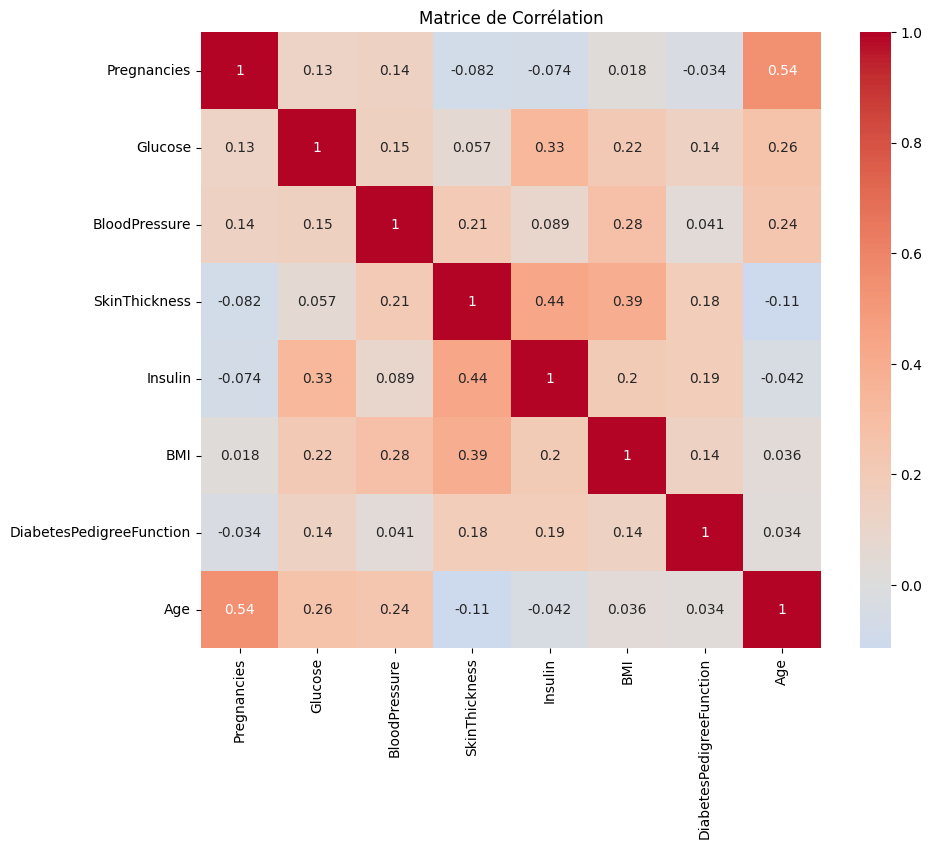

In [91]:
corr_matrix = data[data_col].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matrice de Corrélation')
plt.show()

Hisrogramme des variables numériques:

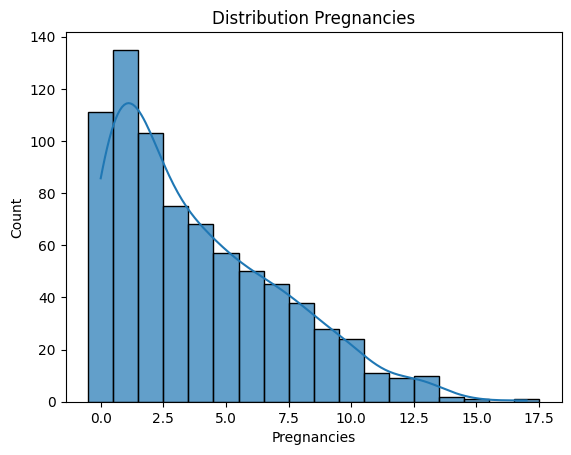

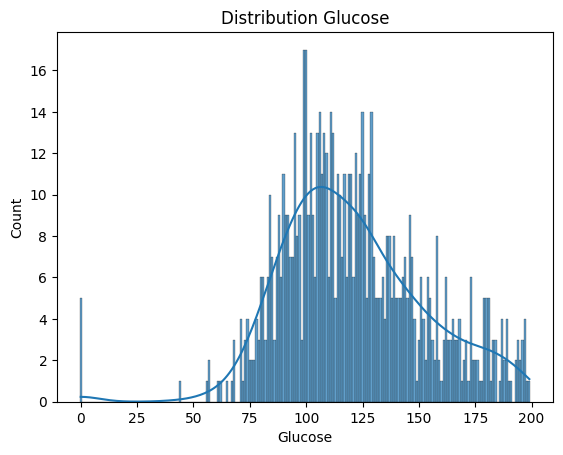

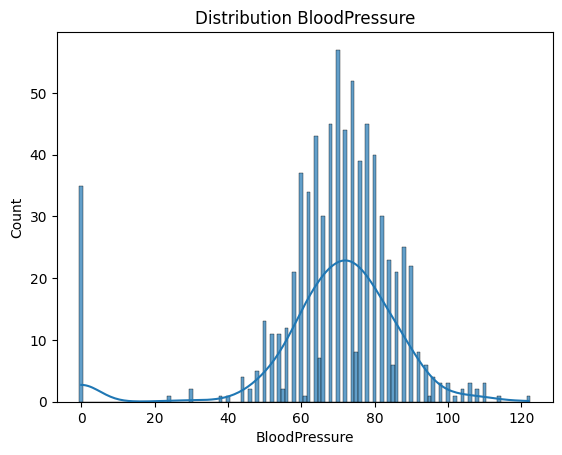

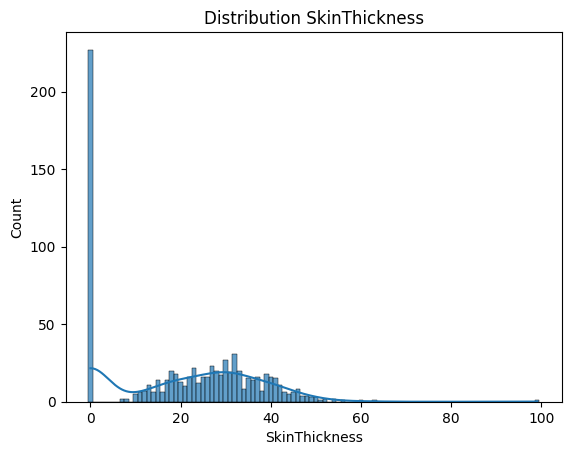

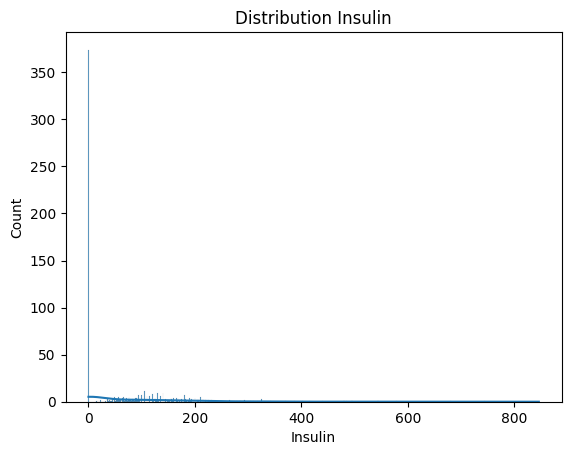

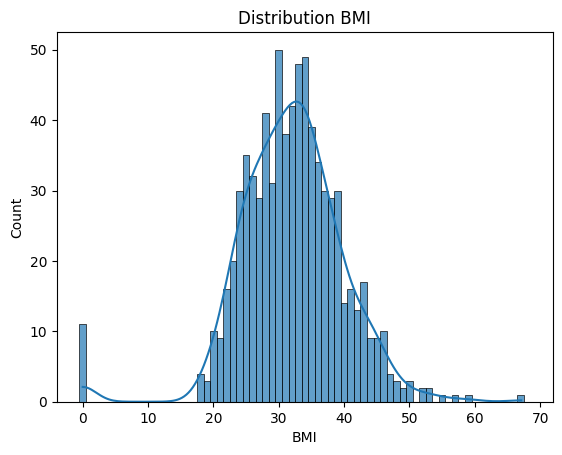

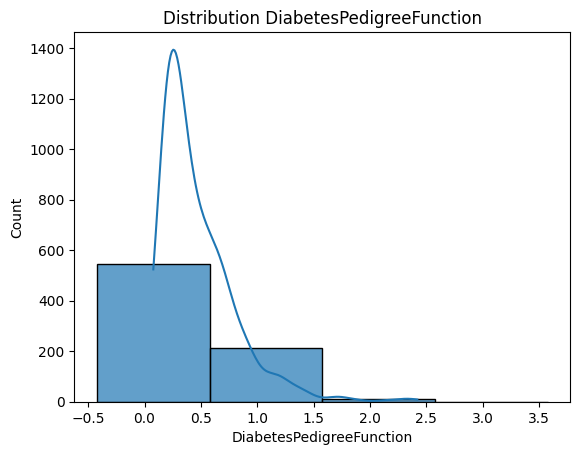

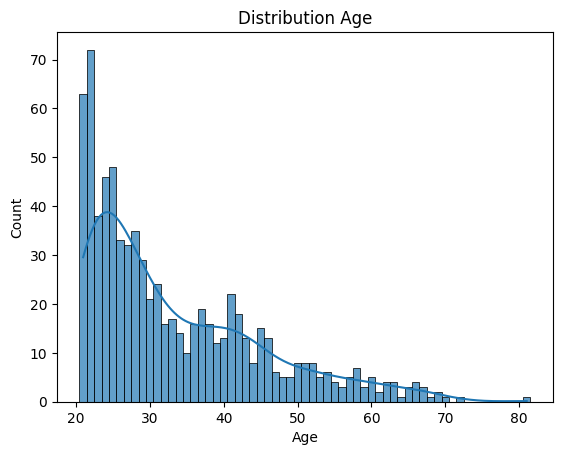

In [92]:
for col in data_col:
    plt.title(f'Distribution {col}')
    sns.histplot(data=data,discrete=True, x=col ,shrink=1, kde=True, alpha=0.7)
    plt.show()

Boite à moustache des données numérique

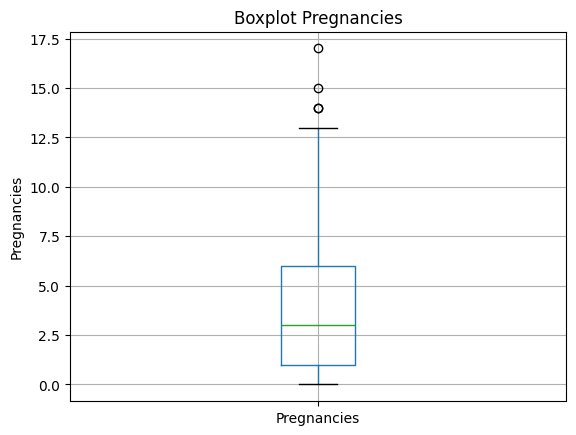

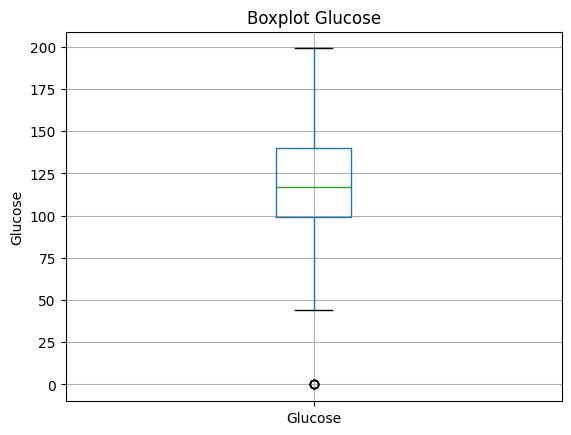

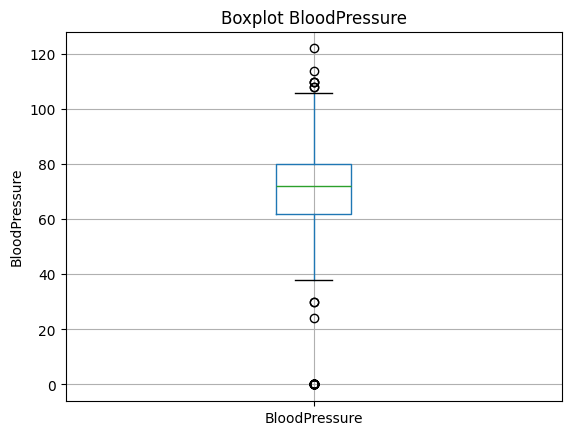

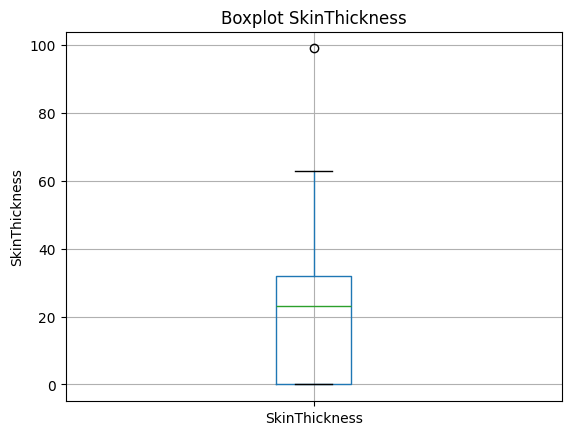

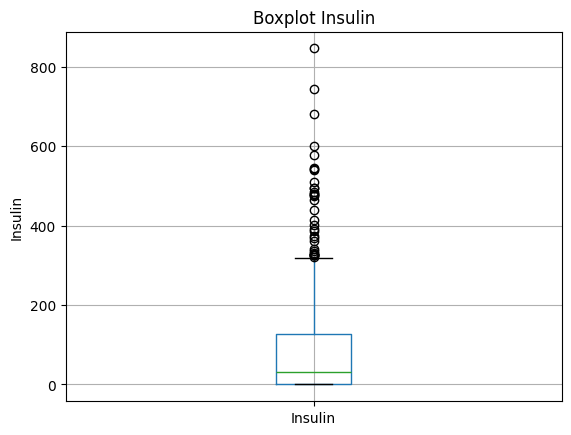

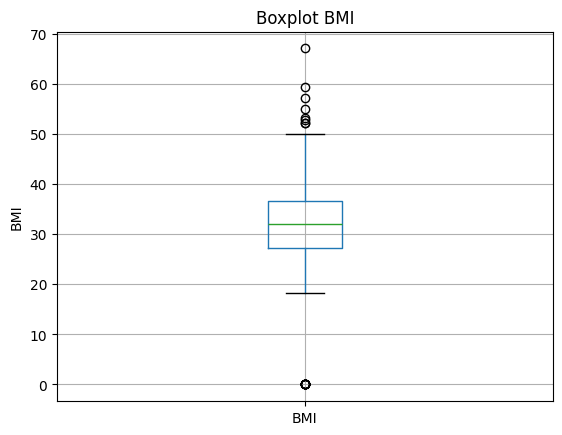

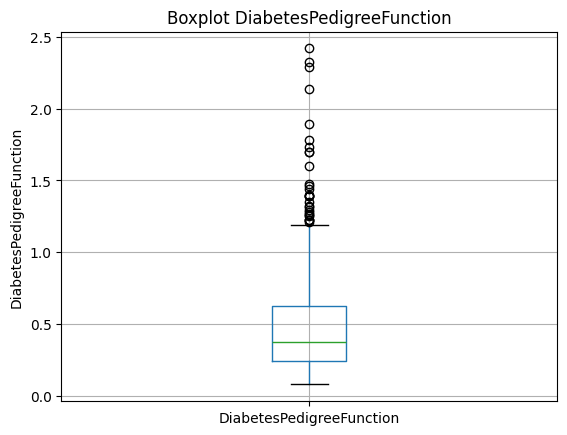

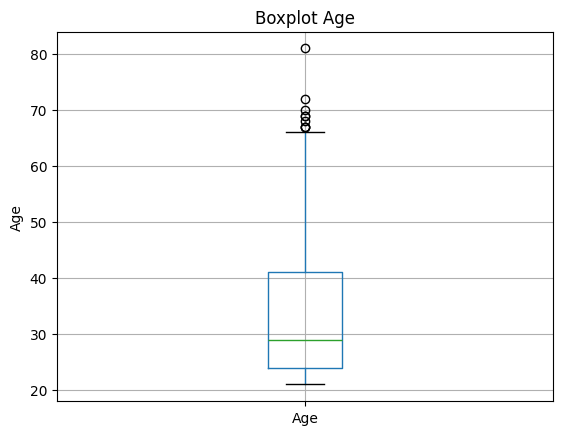

In [93]:
for col in data_col:
    data.boxplot(column=[col])
    plt.title(f'Boxplot {col}')
    plt.ylabel(col)
    plt.show()

Pregnancies

La variable Pregnancies (grossesses) représente le nombre de fois où une femme a été enceinte, peu importe le nombre d'enfants nés vivants.

Nombre total de grossesses, y compris les fausses couches, les grossesses extra-utérines ou les naissances vivantes.

Valeurs observées (0–17) :

0 : Femme jamais enceinte.

1–4 : Grossesses typiques dans la population générale.

≥5 : Grossesses multiples (possible dans certains contextes, surtout pour les femmes plus âgées).

17 : Valeur extrême, possible mais rare (erreur de saisie ?).

Piste: a recouper avec les ages

In [94]:
print(data['Pregnancies'].min())
print(data['Pregnancies'].max())

0
17


In [95]:
print(data[data['Pregnancies']==17][['Age','Pregnancies']])

     Age  Pregnancies
159   47           17


In [96]:
print(data[data['Pregnancies']==15][['Age','Pregnancies']])

    Age  Pregnancies
88   43           15


In [97]:
print(data[data['Pregnancies']==14][['Age','Pregnancies']])

     Age  Pregnancies
298   46           14
455   38           14


In [98]:
print(data[data['Pregnancies']==13][['Age','Pregnancies']])

     Age  Pregnancies
28    57           13
72    42           13
86    45           13
274   52           13
323   43           13
357   44           13
518   41           13
635   38           13
691   44           13
744   39           13


Glucose 

Glycémie à jeun :
La plupart des datasets (comme le Pima Diabetes) utilisent la glycémie à jeun (mesurée après 8h sans manger).

Plages normales :

Normal : 70–99 mg/dL

Prédiabète : 100–125 mg/dL

Diabète : ≥ 126 mg/dL (confirmé par 2 tests)

Valeurs extrêmes dans vos données (0–199) :

< 50 mg/dL : Hypoglycémie sévère (urgence médicale, risque de coma)

0 mg/dL : Erreur évidente (incompatible avec la vie).

199 mg/dL : Signale un diabète probable (seuil diagnostic courant : ≥ 126 mg/dL à jeun).



In [99]:
print(data['Glucose'].min())
print(data['Glucose'].max())

0
199


In [100]:
data[data['Glucose']<50].shape

(6, 9)

BloodPressure

représente très probablement la pression artérielle diastolique (le chiffre du bas, par exemple "80" dans "120/80"), mesurée en mmHg (millimètres de mercure). Voici comment interpréter les valeurs entre 0 et 122 mmHg


0 mmHg :

Physiquement impossible (même en cas d'arrêt cardiaque, la pression ne tombe pas à 0).

Doit être traité comme une donnée manquante/erreur.

1–59 mmHg :

Hypotension dangereuse (sauf pour certains athlètes très entraînés).

Peut indiquer une erreur de mesure (ex. capteur défectueux).

≥90 mmHg :

Hypertension (facteur de risque pour le diabète et les maladies cardiaques).

> 120 urgences

In [101]:
print(data['BloodPressure'].min())
print(data['BloodPressure'].max())

0
122


In [102]:
data[(data['BloodPressure']<40)|(data['BloodPressure']>120)].shape

(40, 9)

SkinThickness

SkinThickness représente généralement l'épaisseur d'un pli cutané
Un pli cutané épais peut suggérer une adiposité excessive, un facteur de risque connu pour le diabète.
Dans certains jeux de données (comme celui de Pima), des valeurs à 0 peuvent être incohérentes (une épaisseur nulle est impossible). Cela peut indiquer des données manquantes mal encodées

Plage normale : Entre 5 mm et 60 mm environ, selon l'âge, le sexe et le niveau d'adiposité.

Exemple : Une personne mince pourrait avoir une épaisseur de 5–15 mm, tandis qu'une personne obèse pourrait dépasser 30–40 mm.

Seuil critique : Dans les jeux de données comme celui des Pima, des valeurs inférieures à 5 mm sont rarement plausibles (sauf chez les enfants ou individus très maigres).

Exemples de références :

Personne mince : 5–15 mm

Surpoids : 20–30 mm

Obésité morbide : 30–60 mm (au maximum).

In [103]:
print(data['SkinThickness'].min())
print(data['SkinThickness'].max())

0
99


In [104]:
data[(data['SkinThickness']==0)].shape

(227, 9)

In [105]:
data[(data['SkinThickness']<5)].shape

(227, 9)

In [106]:
data[data['SkinThickness']>60].shape

(2, 9)

Insulin

La variable Insulin (insuline) dans votre dataset représente très probablement la concentration d'insuline dans le sang, mesurée en μU/mL (micro-unités par millilitre).

0 μU/mL :

Non physiologique (même à jeun, l'insuline ne tombe jamais à 0).

Doit être traité comme une donnée manquante.

Valeurs 1–24 μU/mL :

Normales à jeun, mais 1 μU/mL est suspect (trop bas).

Valeurs >100 μU/mL :

Associées à une résistance à l'insuline (prédiabète/diabète type 2).

>500	Extrêmement élevé (rare, possible erreur)	Peut indiquer un dosage incorrect ou un insulinome (tumeur rare)


In [107]:
print(data['Insulin'].min())
print(data['Insulin'].max())

0
846


In [108]:
data[(data['Insulin']==0)].shape

(374, 9)

In [109]:
data[(data['Insulin']<24)].shape

(382, 9)

In [110]:
data[(data['Insulin']>500)].shape

(9, 9)

BMI

La variable BMI (Indice de Masse Corporelle) est un indicateur clé pour évaluer le risque de diabète. Voici comment interpréter les valeurs entre 0 et 67.1 dans votre dataset

0	Erreur	Donnée impossible
< 16	Dénutrition grave	Urgence médicale
16–18.5	Maigreur	Risque de carences
18.5–25	Poids normal	Risque faible
25–30	Surpoids	Risque modéré de diabète
30–35	Obésité classe I	Risque élevé
35–40	Obésité classe II	Risque très élevé
> 40	Obésité classe III	Risque critique (diabète, MCV)


In [111]:
print(data['BMI'].min())
print(data['BMI'].max())

0.0
67.1


In [112]:
data[(data['BMI']<16)].shape

(11, 9)

In [113]:
data[(data['BMI']>50)].shape

(8, 9)

DiabetesPedigreeFunction

La variable DiabetesPedigreeFunction (DPF) est un indicateur clé dans l'évaluation du risque génétique de diabète. Voici une analyse approfondie pour comprendre et utiliser cette métrique 

0-0.2	Négligeable	Surveillance standard
0.2-0.5	Modéré	Conseils préventifs
0.5-1.0	Élevé	Dépistage intensif
>1.0	Très élevé	Intervention précoce

Les scores >2.0 sont rares et indiquent :

Des antécédents familiaux multiples

Un diagnostic précoce chez plusieurs parents

Possible erreur de saisie à vérifier



In [114]:
print(data['DiabetesPedigreeFunction'].min())
print(data['DiabetesPedigreeFunction'].max())

0.078
2.42


In [115]:
data[data['DiabetesPedigreeFunction']>2].shape

(4, 9)

Age

In [116]:
print(data['Age'].min())
print(data['Age'].max())

21
81


In [118]:
data_clean_1=pps.clean_data_1(data)
print(data.shape)
print(data_clean_1.shape)

(768, 9)
(367, 9)


In [119]:
data_clean_2=pps.clean_data_2(data)
print(data.shape)
print(data_clean_2.shape)

(768, 9)
(708, 11)


In [120]:
data_clean_2.head()

,index_tab,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Insuline_bool,SkinThickness_bool
0,0,6,148,72,35,0,33.6,0.627,50,0,1
1,1,1,85,66,29,0,26.6,0.351,31,0,1
2,2,8,183,64,0,0,23.3,0.672,32,0,0
3,3,1,89,66,23,94,28.1,0.167,21,1,1
5,5,5,116,74,0,0,25.6,0.201,30,0,0


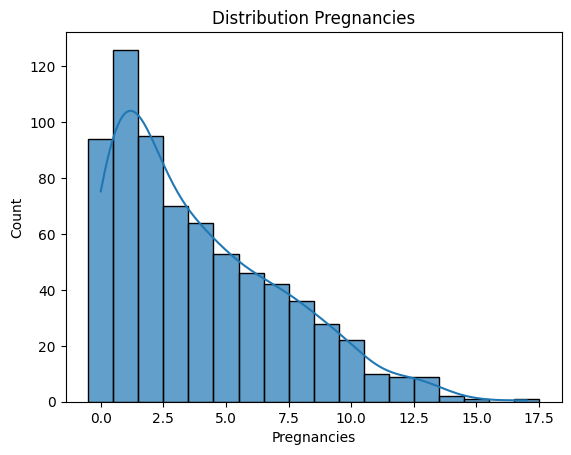

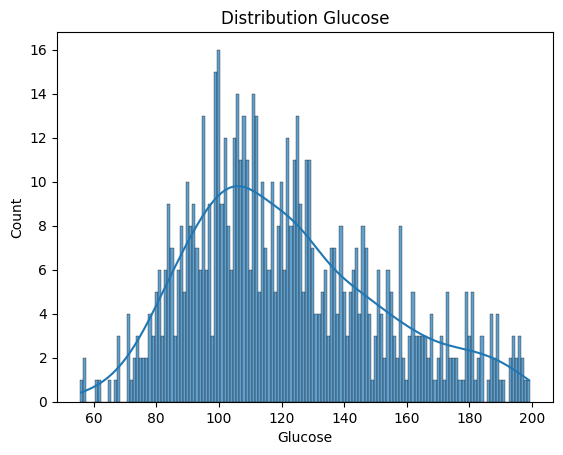

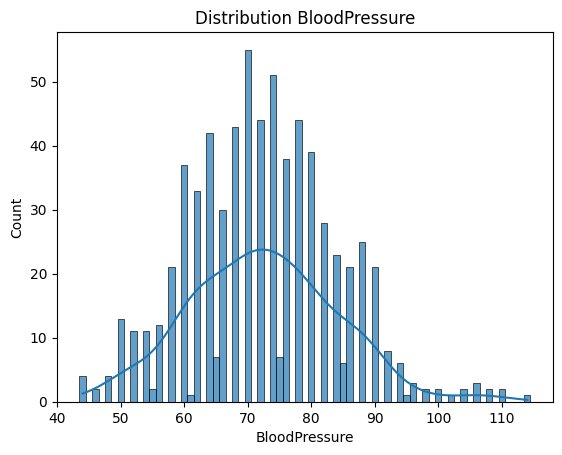

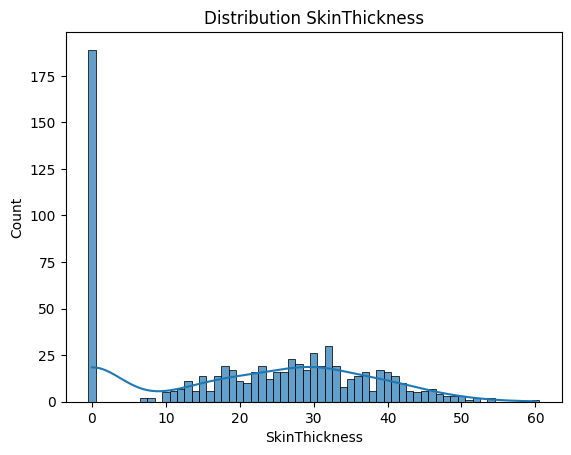

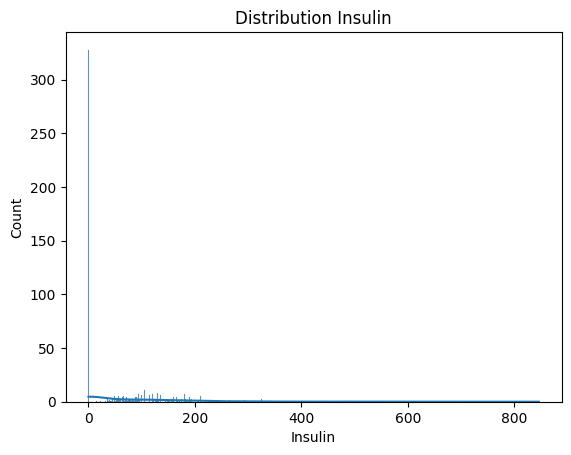

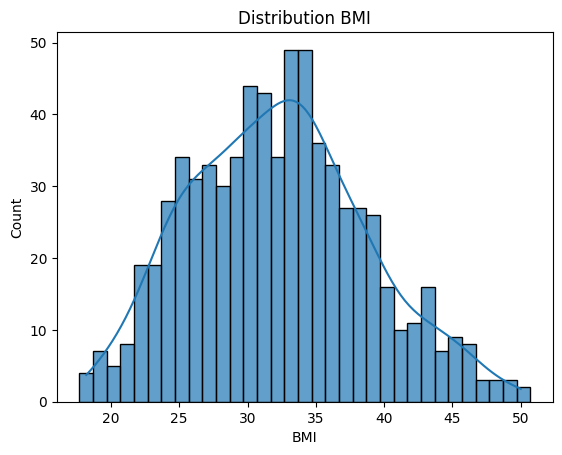

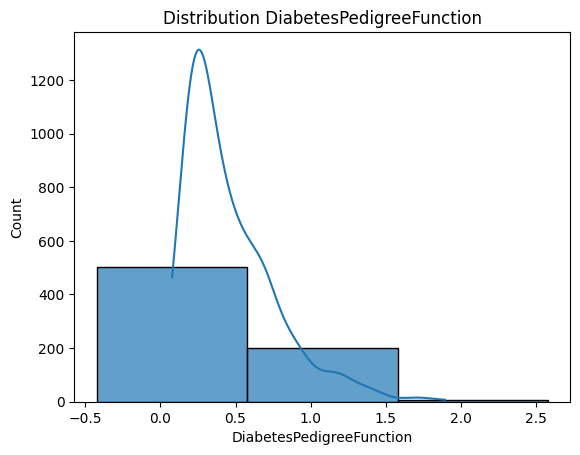

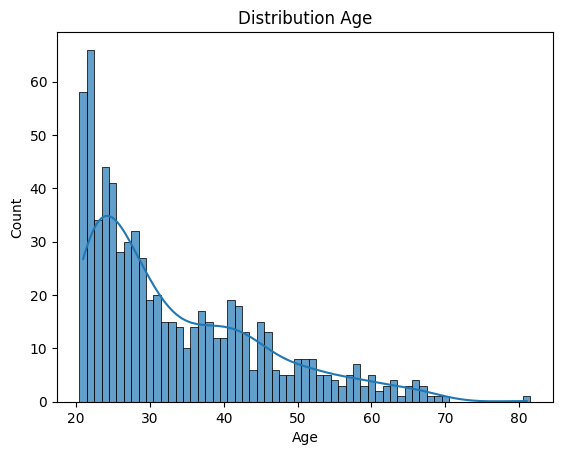

In [122]:
for col in data_col:
    plt.title(f'Distribution {col}')
    sns.histplot(data=data_clean_2,discrete=True, x=col ,shrink=1, kde=True, alpha=0.7)
    plt.show()